**Covid Detection using X-Ray Images**

In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 
import seaborn as sns 
%matplotlib inline 


In [2]:
#train generator 
train_d=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)

In [3]:
train_generator =train_d.flow_from_directory('/content/drive/MyDrive/xray_dataset_covid19/train',
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary'
                                             )

Found 148 images belonging to 2 classes.


In [4]:
test_dataset = ImageDataGenerator(rescale = 1./255)

In [5]:
validation_generator = test_dataset.flow_from_directory('/content/drive/MyDrive/xray_dataset_covid19/test',
                                                        target_size = (224,224),
                                                        batch_size = 32,
                                                        class_mode = 'binary'
                                                        )

Found 40 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
t_img,label=train_generator.next()

In [8]:
t_img.shape

(32, 224, 224, 3)

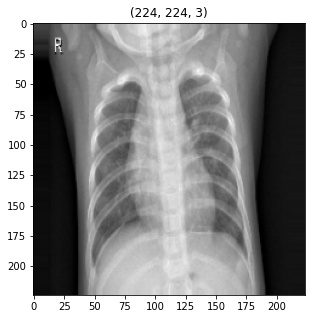

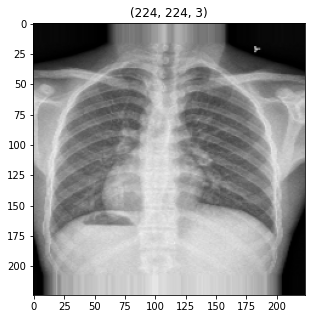

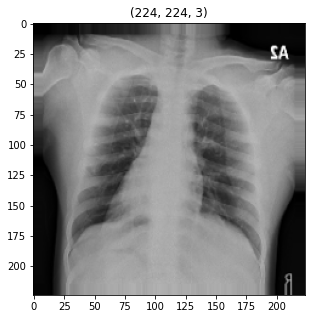

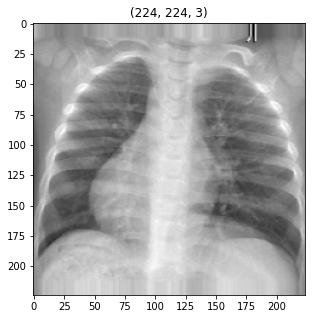

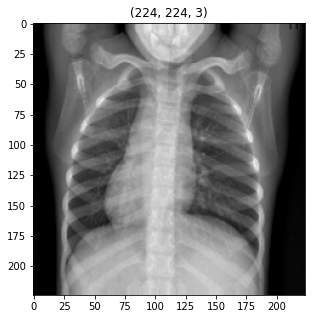

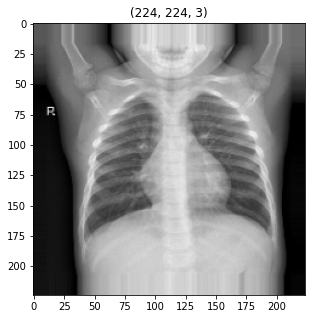

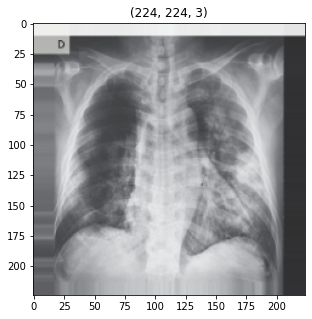

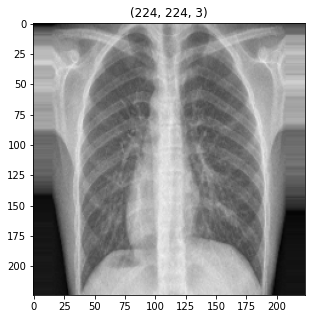

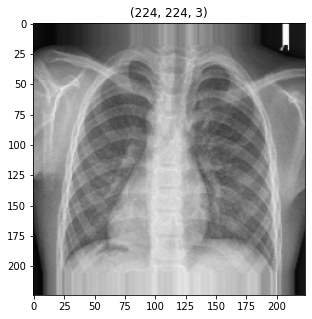

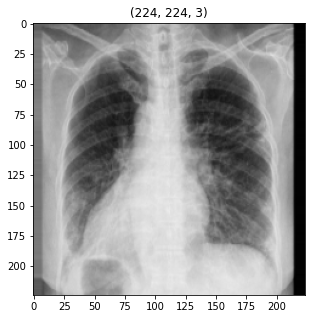

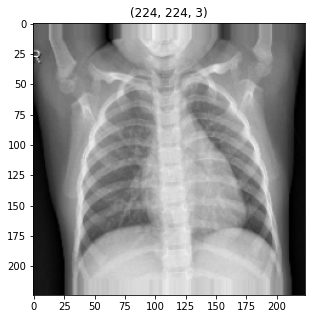

In [9]:
def plotimage(img_arr,label):
    """
    input:image array
    output:plot image
    """
    for idx,img in enumerate(img_arr):
        if idx<=10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()
plotimage(t_img,label)

In [10]:
from keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D,Dense,Flatten,Activation,BatchNormalization,Dropout
from keras.optimizers import Adam, RMSprop
from keras.models import Model
import keras
from tensorflow.keras import layers

In [11]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [19]:
# Set Optimizer
optimizer = Adam(lr = 0.0001)
# Compile Model
model.compile( optimizer= optimizer,loss='binary_crossentropy', metrics=['acc'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [13]:
hist = model.fit(train_generator,epochs = 20,validation_data = validation_generator,validation_steps = 2)

Epoch 1/20
5/5 [==============================] - 14s 2s/step - loss: 0.7703 - accuracy: 0.5270 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 0.6834 - accuracy: 0.5541 - val_loss: 0.6851 - val_accuracy: 0.7750
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 0.6740 - accuracy: 0.5676 - val_loss: 0.6566 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.6101 - accuracy: 0.6622 - val_loss: 0.5164 - val_accuracy: 0.9750
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.5571 - accuracy: 0.6892 - val_loss: 0.5487 - val_accuracy: 0.8500
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.4654 - accuracy: 0.8446 - val_loss: 0.4434 - val_accuracy: 0.9750
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.4080 - accuracy: 0.8243 - val_loss: 0.2723 - val_accuracy: 0.9750
Epoch 8/20
5/5 [========================

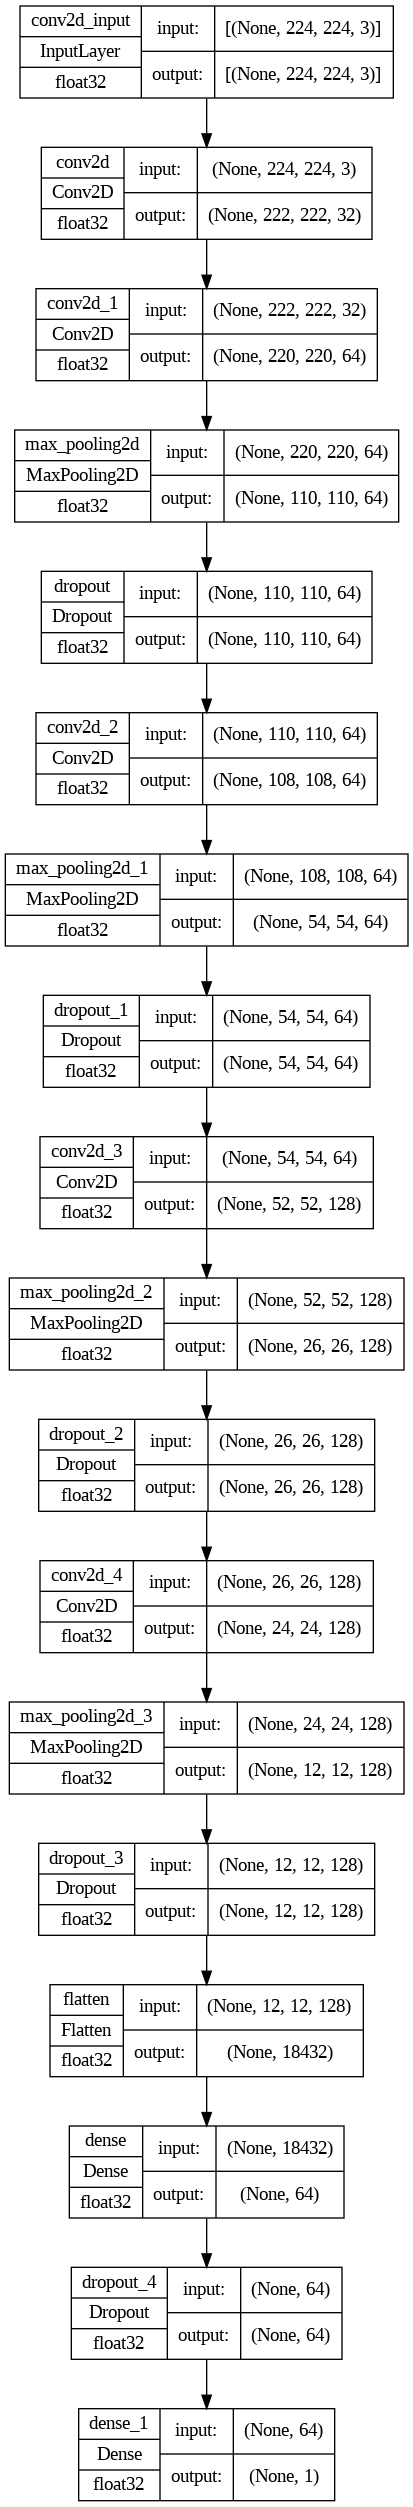

In [14]:
from keras.utils import plot_model
plot_model(model,to_file="model.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [16]:
Model_Results = model.evaluate(validation_generator)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

2/2 [==============================] - 1s 142ms/step - loss: 0.2070 - accuracy: 0.9500
LOSS:  0.2070
ACCURACY:  0.95


In [18]:
model.save_weights("model.h5")

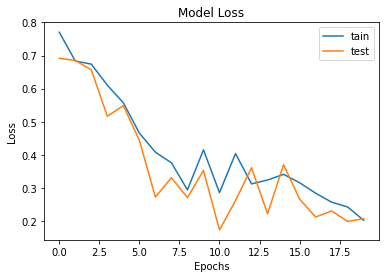

In [23]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['tain','test'])
plt.show()

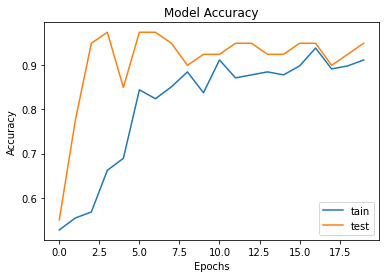

In [25]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['tain','test'])
plt.show()

In [28]:
predictions= (model.predict(validation_generator) >=0.5).astype("int32")

2/2 [==============================] - 1s 180ms/step


In [ ]:
predictions

In [17]:
validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
confusion_matrix(validation_generator.labels,predictions)

array([[11,  9],
       [ 9, 11]])

In [30]:
print(classification_report(validation_generator.labels,predictions))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.55      0.55      0.55        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



In [31]:
import cv2
import random

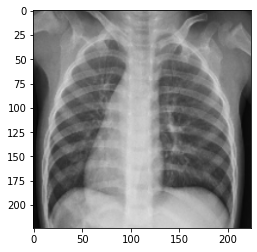


1/1 [==============================] - 0s 15ms/step

Predicting Normal


In [65]:
idx2=random.randint(0,len(label))
plt.imshow(t_img[idx2,:],cmap="gray")
plt.show()
print()
y_pred=model.predict(t_img[idx2,:].reshape(1,224, 224, 3))
y_pred=y_pred>0.5
if y_pred==0:
  print("\nPredicting Normal")
else:
  print('\nPredicting PNEUMONIA')

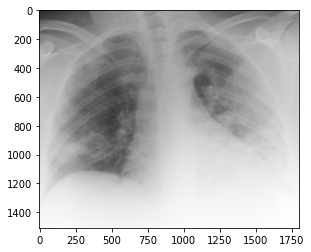

In [60]:
img_pneumonia=cv2.imread('/content/drive/MyDrive/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg')
plt.imshow(img_pneumonia)

In [50]:
img_pneumonia.shape

(1508, 1800, 3)

In [53]:
img_pneumonia=cv2.resize(img_pneumonia,(224,224))

In [54]:
test_input=img_pneumonia.reshape(1,224,224,3)

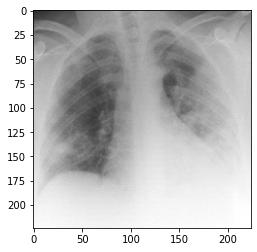


1/1 [==============================] - 0s 17ms/step

Predicting PNEUMONIA


In [57]:
plt.imshow(img_pneumonia)
plt.show()
print()
y_pred=model.predict(img_pneumonia.reshape(1,224,224,3))
y_pred=y_pred>0.5
if y_pred==0:
  print("\nPredicting Normal")
else:
  print('\nPredicting PNEUMONIA')

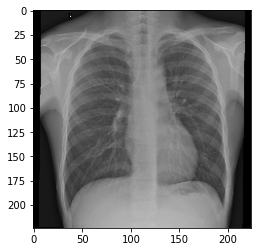


1/1 [==============================] - 0s 17ms/step

Predicting Normal


In [58]:
img_normal=cv2.imread('/content/drive/MyDrive/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg')
img_normal=cv2.resize(img_normal,(224,224))
plt.imshow(img_normal)
plt.show()
print()
y_pred=model.predict(img_normal.reshape(1,224,224,3))
y_pred=y_pred>0.5
if y_pred==0:
  print("\nPredicting Normal")
else:
  print('\nPredicting PNEUMONIA')